<a href="https://colab.research.google.com/github/Vlad-Shapar/machine-learning/blob/main/%D0%A8%D0%B0%D0%BF%D0%B0%D1%80%D1%8C_%D0%BF%D1%80_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

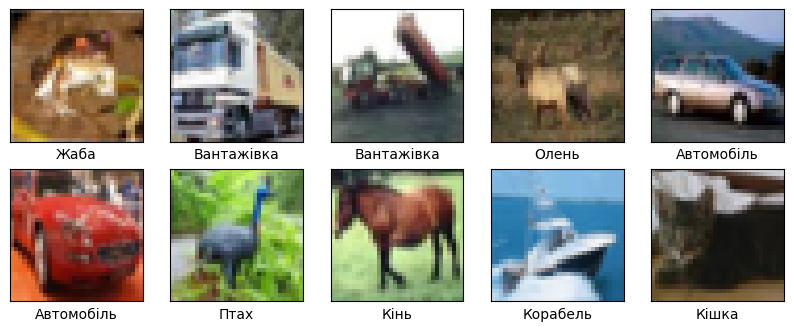

In [ ]:
'''Завдання 1
Імпорт бібліотек і завантаження датасету CIFAR-10'''
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Завантаження датасету CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Нормалізація даних
train_images, test_images = train_images / 255.0, test_images / 255.0

# Виведення перших 10 зображень
class_names = ['Літак', 'Автомобіль', 'Птах', 'Кішка', 'Олень', 'Собака', 'Жаба', 'Кінь', 'Корабель', 'Вантажівка']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [ ]:
'''  Підготовка даних та побудова моделі '''
# Модель зі згортковими шарами, але з іншою архітектурою
model = models.Sequential()

# Додавання більшої кількості шарів
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))  # Додаємо Dropout для різноманітності
model.add(layers.Dense(10, activation='softmax'))

# Показати структуру моделі
model.summary()

# Компіляція моделі з іншим оптимізатором
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Колбеки
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)  # Змінена кількість patience
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3)  # Трохи змінили patience

# Навчання моделі з іншим розміром батча
history = model.fit(train_images, train_labels, epochs=15,  # Більше епох
                    batch_size=64,  # Інший розмір батча
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, lr_reduction])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 750,346 (2.86 MB)

 Trainable params: 750,346 (2.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.3104 - loss: 1.8317 - val_accuracy: 0.5423 - val_loss: 1.3091 - learning_rate: 0.0010
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5602 - loss: 1.2430 - val_accuracy: 0.6127 - val_loss: 1.0769 - learning_rate: 0.0010
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6330 - loss: 1.0502 - val_accuracy: 0.6473 - val_loss: 1.0038 - learning_rate: 0.0010
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6694 - loss: 0.9431 - val_accuracy: 0.6920 - val_loss: 0.8818 - learning_rate: 0.0010
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7038 - loss: 0.8416 - val_accuracy: 0.7076 - val_loss: 0.8443 - learning_rate: 0.0010
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7288 - loss: 0.7703 - val_accuracy: 0.7120 - val_loss: 0.8351 - learning_rate: 0.0010
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7567 - loss: 0.7003 

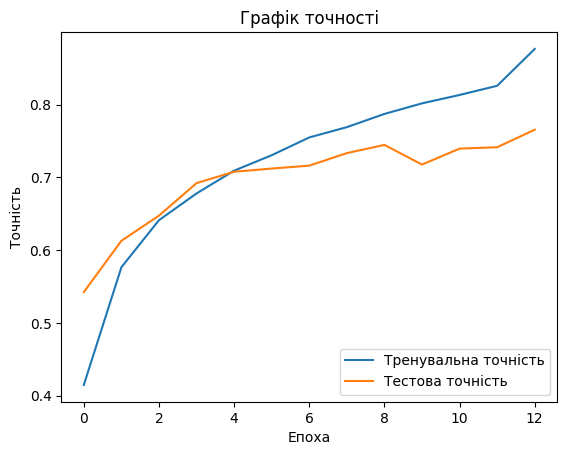

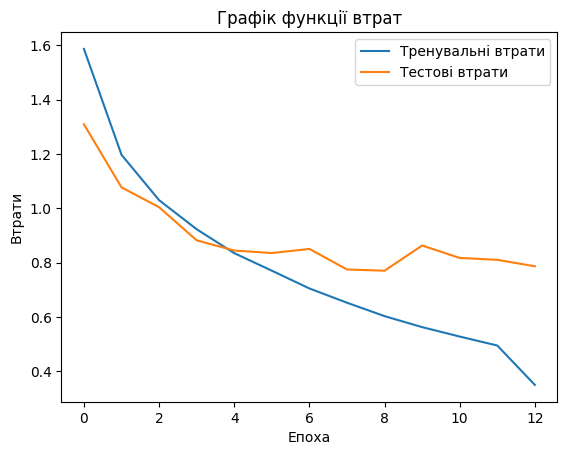

In [ ]:
'''  Виведення графіків функції втрат і точності '''
# Графік точності
plt.plot(history.history['accuracy'], label='Тренувальна точність')
plt.plot(history.history['val_accuracy'], label='Тестова точність')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend(loc='lower right')
plt.title('Графік точності')
plt.show()

# Графік функції втрат
plt.plot(history.history['loss'], label='Тренувальні втрати')
plt.plot(history.history['val_loss'], label='Тестові втрати')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend(loc='upper right')
plt.title('Графік функції втрат')
plt.show()


In [ ]:
'''  Класифікаційний звіт '''
# Оцінка моделі
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Передбачення
predictions = model.predict(test_images)

# Звіт про класифікацію
y_pred = predictions.argmax(axis=1)
print(classification_report(test_labels, y_pred, target_names=class_names))


313/313 - 1s - 4ms/step - accuracy: 0.7654 - loss: 0.7863
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

       Літак       0.79      0.82      0.80      1000
  Автомобіль       0.87      0.86      0.87      1000
        Птах       0.67      0.66      0.66      1000
       Кішка       0.59      0.59      0.59      1000
       Олень       0.73      0.73      0.73      1000
      Собака       0.68      0.67      0.68      1000
        Жаба       0.82      0.83      0.83      1000
        Кінь       0.82      0.79      0.80      1000
    Корабель       0.86      0.85      0.86      1000
  Вантажівка       0.83      0.85      0.84      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



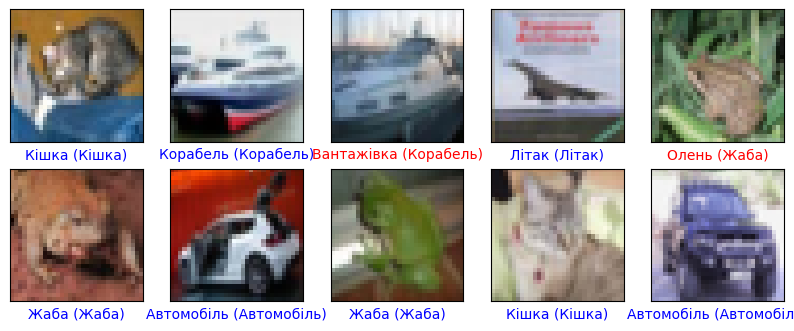

In [ ]:
''' Візуалізація розпізнавання  '''
# Візуалізація передбачень
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    predicted_label = class_names[y_pred[i]]
    true_label = class_names[test_labels[i][0]]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f'{predicted_label} ({true_label})', color=color)
plt.show()


In [ ]:
''' Завдання 2
 Імпорт та підготовка ResNet50  '''
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.datasets import cifar10

# Завантаження датасету CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Зміна розміру зображень до 224x224
train_images_resized = tf.image.resize(train_images, (224, 224))
test_images_resized = tf.image.resize(test_images, (224, 224))

# Нормалізація даних
train_images_resized /= 255.0
test_images_resized /= 255.0

# Завантаження моделі ResNet50 з попередньо навченими вагами
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Заморожуємо перші шари
for layer in resnet_base.layers[:100]:  # Заморожуємо перші 100 шарів
    layer.trainable = False

# Додаємо нові шари для класифікації
model_resnet = models.Sequential()
model_resnet.add(resnet_base)  # Базова модель ResNet50
model_resnet.add(layers.Flatten())
model_resnet.add(layers.Dense(512, activation='relu'))
model_resnet.add(layers.Dropout(0.5))  # Dropout для запобігання перенавчанню
model_resnet.add(layers.Dense(10, activation='softmax'))

# Показати структуру моделі
model_resnet.summary()

# Компіляція моделі
model_resnet.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Колбеки
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2)

# Навчання моделі
history_resnet = model_resnet.fit(train_images_resized, train_labels, epochs=12,  # Зменшена кількість епох
                                  validation_data=(test_images_resized, test_labels),
                                  callbacks=[early_stopping, lr_reduction])


In [ ]:
''' Графіки функції втрат і точності '''
# Графік точності
plt.plot(history_resnet.history['accuracy'], label='Тренувальна точність')
plt.plot(history_resnet.history['val_accuracy'], label='Тестова точність')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend(loc='lower right')
plt.title('Графік точності ResNet50')
plt.show()

# Графік функції втрат
plt.plot(history_resnet.history['loss'], label='Тренувальні втрати')
plt.plot(history_resnet.history['val_loss'], label='Тестові втрати')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend(loc='upper right')
plt.title('Графік функції втрат ResNet50')
plt.show()


In [ ]:
''' Класифікаційний звіт  '''
# Оцінка моделі ResNet50
test_loss_resnet, test_acc_resnet = model_resnet.evaluate(test_images, test_labels, verbose=2)

# Передбачення
predictions_resnet = model_resnet.predict(test_images)

# Звіт про класифікацію
y_pred_resnet = predictions_resnet.argmax(axis=1)
print(classification_report(test_labels, y_pred_resnet, target_names=class_names))


In [ ]:
'''  Візуалізація розпізнавання '''
# Візуалізація передбачень ResNet50
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    predicted_label = class_names[y_pred_resnet[i]]
    true_label = class_names[test_labels[i][0]]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f'{predicted_label} ({true_label})', color=color)
plt.show()


In [ ]:
'''Обидва підходи продемонстрували високу ефективність у задачі класифікації
зображень CIFAR-10. Пряме навчання моделі з нуля дозволяє краще контролювати
архітектуру та специфікації моделі, тоді як тонке налаштування попередньо
навченої моделі є швидшим і може призводити до вищої точності на складних задачах. '''